In [1]:
import pytest
import numpy as np

import utils as tu
import gefera as gf
import matplotlib.pyplot as plt

In [ ]:
tu.random_args_conf()

In [110]:
d = np.array(tu.random_args_conf(dictionary=False))
t = np.linspace(0, np.max([d[3], d[9]]), 10)
dx = 1e-8

o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
sys = gf.ConfocalSystem(o1, o2)

bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)
dbp_fd = np.zeros_like(dbp)
dbpm_fd = np.zeros_like(dbpm)
dtheta_fd = np.zeros_like(dtheta)

print('[', end='')
for di in d[:-1]:
    print('{0},'.format(di), end=' ')
print(d[-1], end='')
print(']')

for i in range(len(d)):
    d[i] += dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_plus = gf.ConfocalSystem(o1, o2)
    
    d[i] -= 2 * dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_minus = gf.ConfocalSystem(o1, o2)
    
    bp_plus, bpm_plus, theta_plus = sys_plus.impacts(t)
    bp_minus, bpm_minus, theta_minus = sys_minus.impacts(t)
    
    dbp_fd[i, :] = (bp_plus - bp_minus) / (2 * dx)
    dbpm_fd[i, :] = (bpm_plus - bpm_minus) / (2 * dx)
    dtheta_fd[i, :] = (theta_plus - theta_minus) / (2 * dx)
    
    assert np.all(np.isclose(dbp[i], dbp_fd[i], atol=1e-4))
    assert np.all(np.isclose(dbpm[i], dbpm_fd[i], atol=1e-4))
    assert np.all(np.isclose(dtheta[i], dtheta_fd[i], atol=1e-4))

[5.295774881363932, -1.9240431774039237, 0.3761988177275336, 15.394449929314463, 5.15228108580988, 1.3281246873830161, 7.396004566351671, -5.35671764128111, 0.33223371889581993, 82.4677110931116, 1.789480468322387, 2.1302746882912555, 0.20917047948559375]


In [ ]:
for i in range(len(d)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, dbp[i])
    axs[0].plot(t, dbp_fd[i])
    axs[1].plot(t, dbpm[i])
    axs[1].plot(t, dbpm_fd[i])
    axs[2].plot(t, dtheta[i])
    axs[2].plot(t, dtheta_fd[i])

In [126]:
d = np.array(tu.random_args_hrch(dictionary=False))
t = np.linspace(0, np.max([d[3], d[9]]), 10)
dx = 1e-8

print('[', end='')
for di in d[:-1]:
    print('{0},'.format(di), end=' ')
print(d[-1], end='')
print(']')

o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
sys = gf.HierarchicalSystem(o1, o2)

bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)
dbp_fd = np.zeros_like(dbp)
dbpm_fd = np.zeros_like(dbpm)
dtheta_fd = np.zeros_like(dtheta)

for i in range(len(d)):
    d[i] += dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
    sys_plus = gf.HierarchicalSystem(o1, o2)
    
    d[i] -= 2 * dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
    sys_minus = gf.HierarchicalSystem(o1, o2)
    
    bp_plus, bpm_plus, theta_plus = sys_plus.impacts(t)
    bp_minus, bpm_minus, theta_minus = sys_minus.impacts(t)
    
    dbp_fd[i, :] = (bp_plus - bp_minus) / (2 * dx)
    dbpm_fd[i, :] = (bpm_plus - bpm_minus) / (2 * dx)
    dtheta_fd[i, :] = (theta_plus - theta_minus) / (2 * dx)
    
    assert np.all(np.isclose(dbp[i], dbp_fd[i], atol=1e-4))
    assert np.all(np.isclose(dbpm[i], dbpm_fd[i], atol=1e-4))
    assert np.all(np.isclose(dtheta[i], dtheta_fd[i], atol=1e-4))

[2.9078110378050805, -8.160712480255077, 0.7593436485333901, 20.774078580569, 0.0042449085400546906, 0.4494363877542704, 0.2729653902580974, -2.027511209323234, 0.20314301082170994, 2.28025396976346, 3.496920437928921, 1.0168878224857407, 1.2214339490597386, 0.6117761894719778]


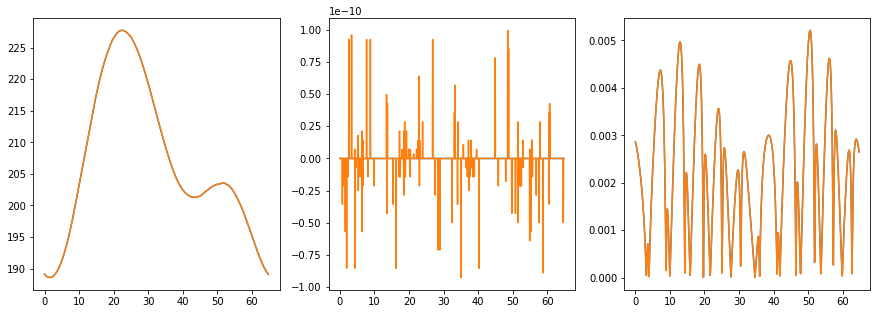

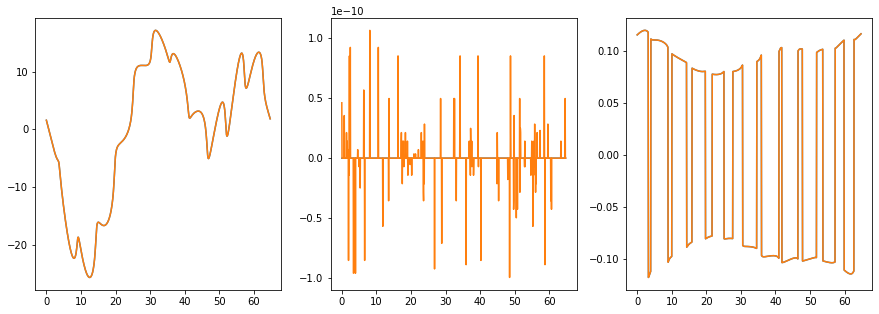

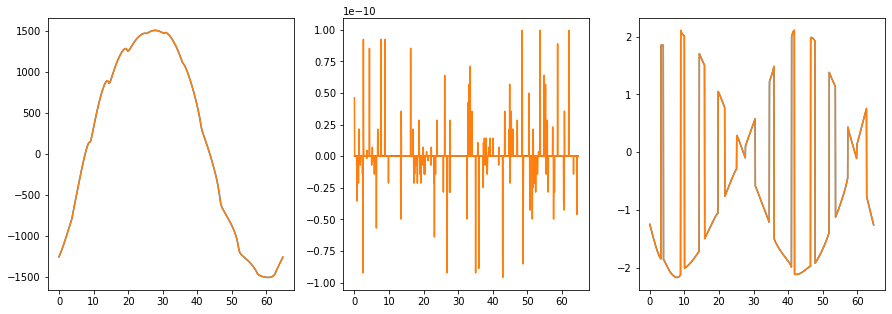

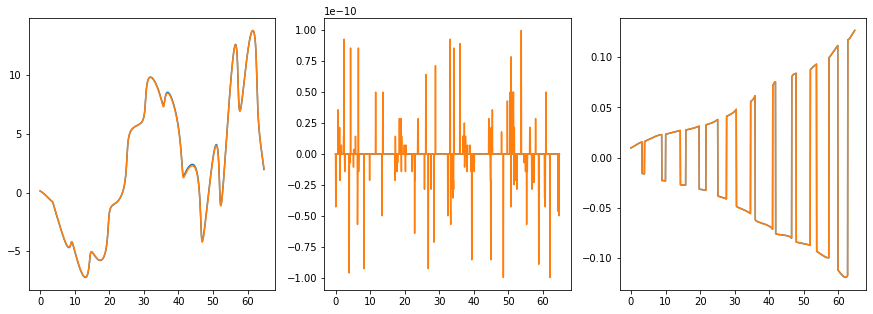

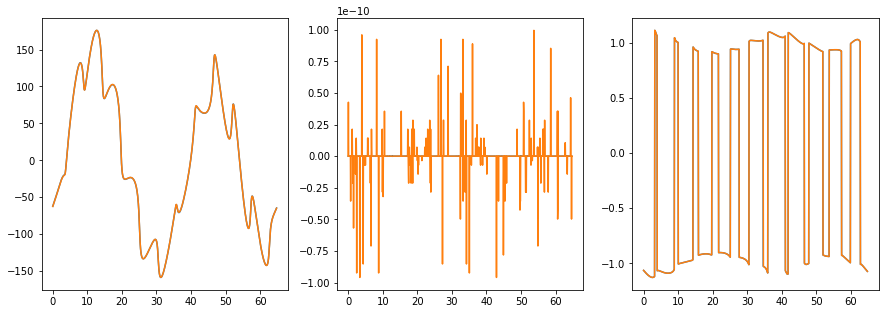

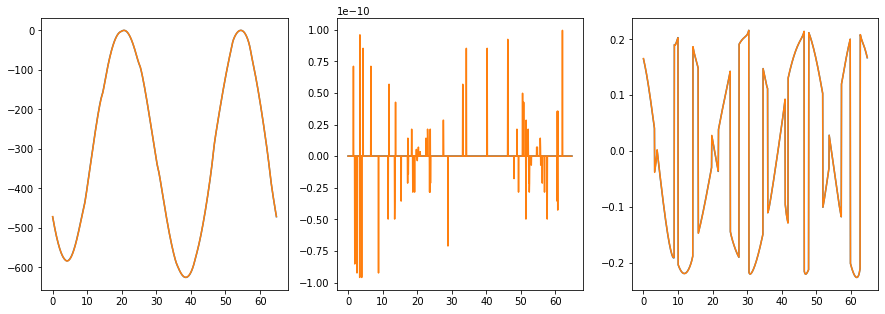

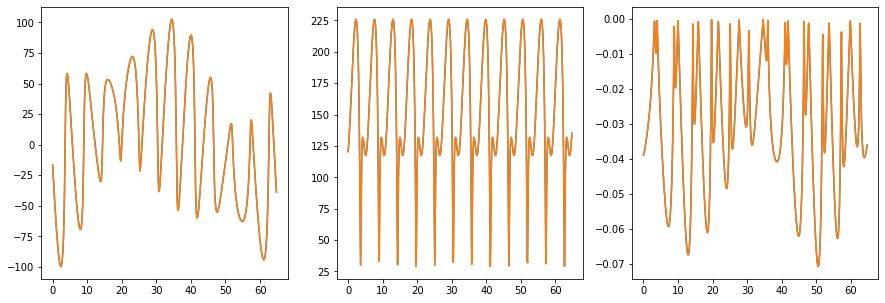

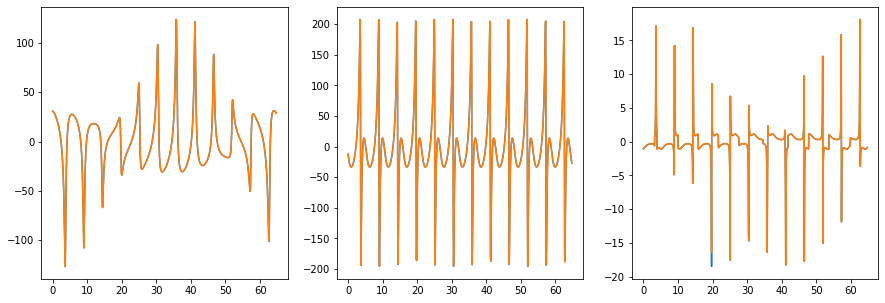

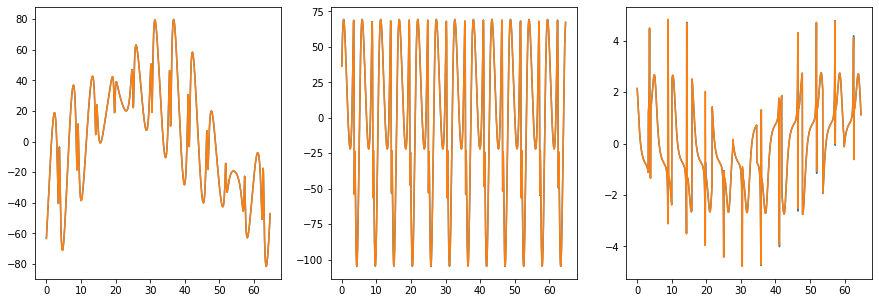

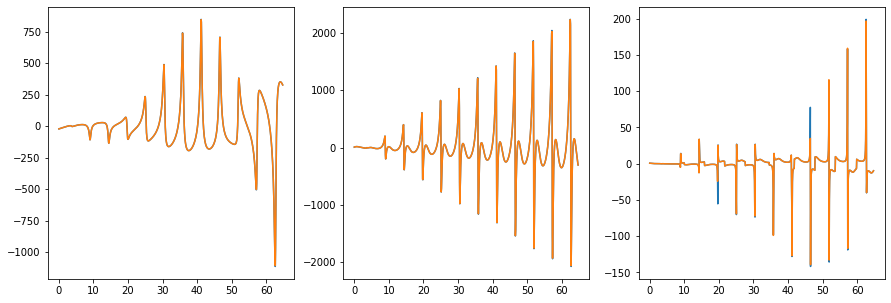

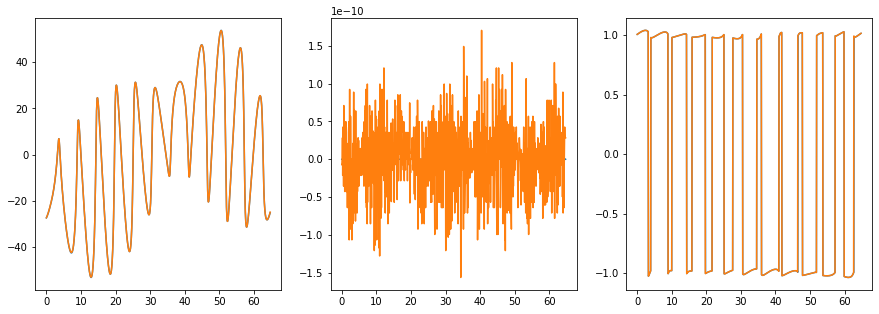

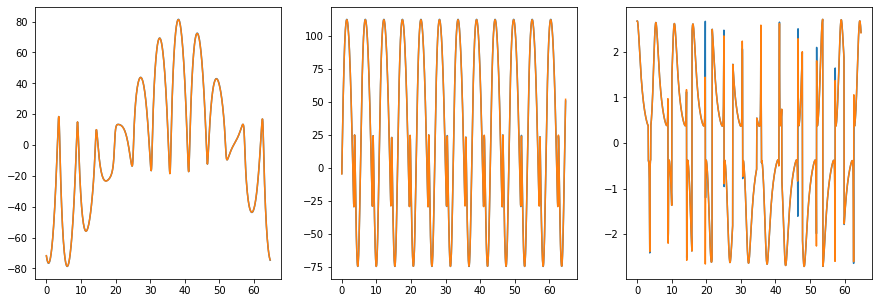

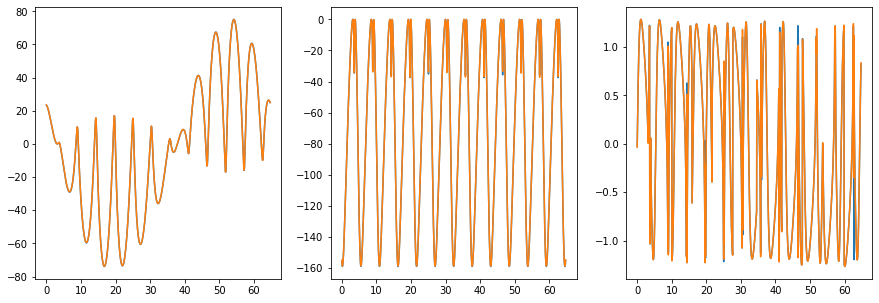

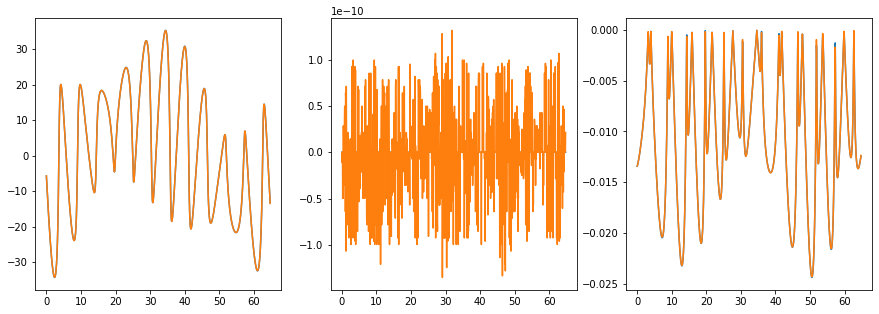

In [55]:
for i in range(len(d)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, dbp[i])
    axs[0].plot(t, dbp_fd[i])
    axs[1].plot(t, dbpm[i])
    axs[1].plot(t, dbpm_fd[i])
    axs[2].plot(t, dtheta[i])
    axs[2].plot(t, dtheta_fd[i])